## 코로나 업종 뉴스 기사 검색(2)

In [1]:
from bs4 import BeautifulSoup 
from urllib.request import Request, urlopen

import pandas as pd
import re

### # 웹크롤링한 데이터 읽어오기

In [2]:
# df = pd.read_csv('data/exam-WebParsing.csv')       
df = pd.read_csv('data/covid_2022.csv') 
df.head()

,Unnamed: 0,오늘날짜,기사시점,기사제목,URL
0,0,2022-06-21_15시08분,1개월 전,"북한 '평양에 오미크론 발생'...코로나 2년만에 첫 감염자 인정, 왜 지금?",https://www.bbc.com/korean/news-61419559
1,1,2022-06-21_15시08분,1개월 전,"北, 국내 코로나 감염자 발생 사실 밝혀…확진 공식 인정한 첫 사례",https://www.dailynk.com/20220512-3/
2,2,2022-06-21_15시08분,1개월 전,"2년 넘게 '0명 감염' 주장한 북한, 코로나19 확진자 첫 공식 발표",https://www.hani.co.kr/arti/politics/defense/1...
3,3,2022-06-21_15시08분,2022. 4. 6.,5월부터 국제선 하늘길 활짝…연말까지 코로나 이전의 50% 회복,https://m.korea.kr/news/policyNewsView.do?news...
4,4,2022-06-21_15시08분,4일 전,"""격리 풀면 코로나19 재확산 앞당길수도""…7일 격리의무 4주 연장",https://m.dongascience.com/news.php?idx=54921


In [28]:
# index_col='Unnamed: 0'') 삭제
del df['Unnamed: 0']
df.head()

,오늘날짜,기사시점,기사제목,URL
0,2022-06-21_15시08분,1개월 전,"북한 '평양에 오미크론 발생'...코로나 2년만에 첫 감염자 인정, 왜 지금?",https://www.bbc.com/korean/news-61419559
1,2022-06-21_15시08분,1개월 전,"北, 국내 코로나 감염자 발생 사실 밝혀…확진 공식 인정한 첫 사례",https://www.dailynk.com/20220512-3/
2,2022-06-21_15시08분,1개월 전,"2년 넘게 '0명 감염' 주장한 북한, 코로나19 확진자 첫 공식 발표",https://www.hani.co.kr/arti/politics/defense/1...
3,2022-06-21_15시08분,2022. 4. 6.,5월부터 국제선 하늘길 활짝…연말까지 코로나 이전의 50% 회복,https://m.korea.kr/news/policyNewsView.do?news...
4,2022-06-21_15시08분,4일 전,"""격리 풀면 코로나19 재확산 앞당길수도""…7일 격리의무 4주 연장",https://m.dongascience.com/news.php?idx=54921


In [29]:
len(df)

100

### # 첫번째 URL 페이지 크롤링하기

In [3]:
def get_read_web(url):    
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req).read()
    soup = BeautifulSoup(html, "lxml")    
    return soup

In [4]:
news_Text = str()

for i in range(len(df)):
    soup = get_read_web(df['URL'][i])
    news_data = soup.get_text()
    news_text = news_data.replace('\t', ' ')
    news_text = news_text.replace('\n', ' ')
    news_text = news_text.replace('\r', ' ')
    news_text = news_text.strip()
    news_Text = news_Text + news_text

### # 워드클라우드

In [5]:
from konlpy.tag import Okt

In [6]:
okt = Okt()

In [7]:
news_nouns = okt.nouns(news_Text)
news_nouns

['북한',
 '평양',
 '오미크론',
 '발생',
 '코로나',
 '첫',
 '감염',
 '인정',
 '왜',
 '지금',
 '코리아',
 '코리아',
 '내용',
 '보기',
 '섹션',
 '뉴스',
 '비디오',
 '다운로드',
 '뉴스',
 '뉴스',
 '비디오',
 '다운로드',
 '뉴스',
 '북한',
 '평양',
 '오미크론',
 '발생',
 '코로나',
 '첫',
 '감염',
 '인정',
 '왜',
 '지금',
 '출처',
 '사진',
 '설명',
 '북한',
 '코로나',
 '감염',
 '발생',
 '사실',
 '인정',
 '것',
 '이번',
 '처음',
 '북한',
 '신종',
 '코로나바이러스',
 '감염증',
 '코로나',
 '첫',
 '감염',
 '발생',
 '조선',
 '중앙',
 '통신',
 '오늘',
 '개월',
 '온',
 '우리',
 '비상',
 '방역',
 '전선',
 '파',
 '공이',
 '국가',
 '최',
 '중대',
 '비상',
 '사건',
 '발생',
 '며',
 '전',
 '통신',
 '국가',
 '비상',
 '방역',
 '지휘',
 '부와',
 '해당',
 '단위',
 '지난',
 '수도',
 '단체',
 '유열',
 '자',
 '채집',
 '검체',
 '대한',
 '유전자',
 '배열',
 '분석',
 '결과',
 '심의',
 '최근',
 '세계',
 '전파',
 '오미크론',
 '변',
 '바이러스',
 '일치',
 '결론',
 '고',
 '전',
 '북한',
 '코로나',
 '감염',
 '발생',
 '인정',
 '것',
 '이번',
 '처음',
 '북한',
 '코로나',
 '백신',
 '거부',
 '구세주',
 '백신',
 '수령',
 '북한',
 '왜',
 '코로나',
 '백신',
 '접종',
 '모니터링',
 '북한',
 '한국',
 '드라마',
 '유포',
 '시',
 '처형',
 '유엔',
 '대북',
 '서한',
 '발송',
 '김정은',
 '빈틈',
 '차단하라',
 '사진',
 '출처',
 

In [8]:
news_nouns[:10]

['북한', '평양', '오미크론', '발생', '코로나', '첫', '감염', '인정', '왜', '지금']

In [9]:
one_words = []
tow_words = []
etc_words = []

for noun in news_nouns:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        tow_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(tow_words), len(etc_words)

(15565, 66747, 20559)

In [10]:
stop_words = ['뉴스','한경','기사','업종','코로나',
              '기자','전체','구독','보기','메뉴',
              '바로가기','스포츠','연합뉴스','검색',
              '검색','관련','신문','대비','번호',
              '한겨레','센터','경우','한국','문의',
              '광고','댓글','트위터','영상','포토',
              '칼럼','페이스북','연예','김건희', '네이버',
              '폰트','로그인', '진자', '발사', '코로나바이러스',
              '연재','리포트','소개','저작권','출처',
              '위해','통해','다운로드'
             ]
# stop_words = ['제', '월', '일','조','수','때','그','이','바','및','안']
stop_words.extend(one_words)
len(stop_words)

15612

In [11]:
# stop_words 빼기
news_nouns = [ word for word in news_nouns if word not in stop_words ]
len(news_nouns)

76607

In [12]:
import nltk

In [13]:
news_text = nltk.Text(news_nouns)
type(news_text), len(news_text)

(nltk.text.Text, 76607)

In [14]:
# 상위 500개 수 
data = news_text.vocab().most_common(300)
# data = news_text.vocab()
data

[('정책', 866),
 ('과학', 515),
 ('미래', 419),
 ('감염', 412),
 ('정부', 397),
 ('접종', 387),
 ('백신', 370),
 ('북한', 351),
 ('공유', 340),
 ('의료', 306),
 ('격리', 277),
 ('사회', 276),
 ('방역', 271),
 ('기후', 268),
 ('지금', 260),
 ('교육', 257),
 ('중국', 252),
 ('사이언스', 250),
 ('일반', 244),
 ('관리', 237),
 ('검사', 230),
 ('우주', 230),
 ('치료', 228),
 ('누리', 226),
 ('내용', 224),
 ('브리핑', 224),
 ('대응', 221),
 ('서비스', 218),
 ('경제', 217),
 ('미국', 214),
 ('과학기술', 214),
 ('사진', 212),
 ('환자', 210),
 ('사실', 209),
 ('발생', 198),
 ('이용', 198),
 ('국제', 195),
 ('문화', 194),
 ('감염병', 193),
 ('상황', 192),
 ('이슈', 181),
 ('산업', 181),
 ('이상', 178),
 ('바이러스', 177),
 ('열기', 177),
 ('신규', 177),
 ('세상', 170),
 ('세계', 168),
 ('게시', 168),
 ('기관', 167),
 ('지원', 165),
 ('위원회', 165),
 ('정치', 162),
 ('오미크론', 160),
 ('카카오', 158),
 ('확인', 157),
 ('국민', 152),
 ('지난', 151),
 ('본문', 151),
 ('다음', 150),
 ('기고', 149),
 ('동아', 149),
 ('유행', 148),
 ('자료', 147),
 ('질병', 147),
 ('생활', 146),
 ('결과', 144),
 ('인간', 144),
 ('신청', 142),
 ('대한민국', 141),
 ('스페

In [71]:
frame.to_excel('data/covid_2022_words.xlsx', encoding='UTF-8')

### # 워드클라우드 한글폰트 설정

In [15]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [16]:
# data를 딕셔너리 형태로 변환
dict_data = dict(data)
len(dict_data)

300

In [19]:
# !pip install wordcloud

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

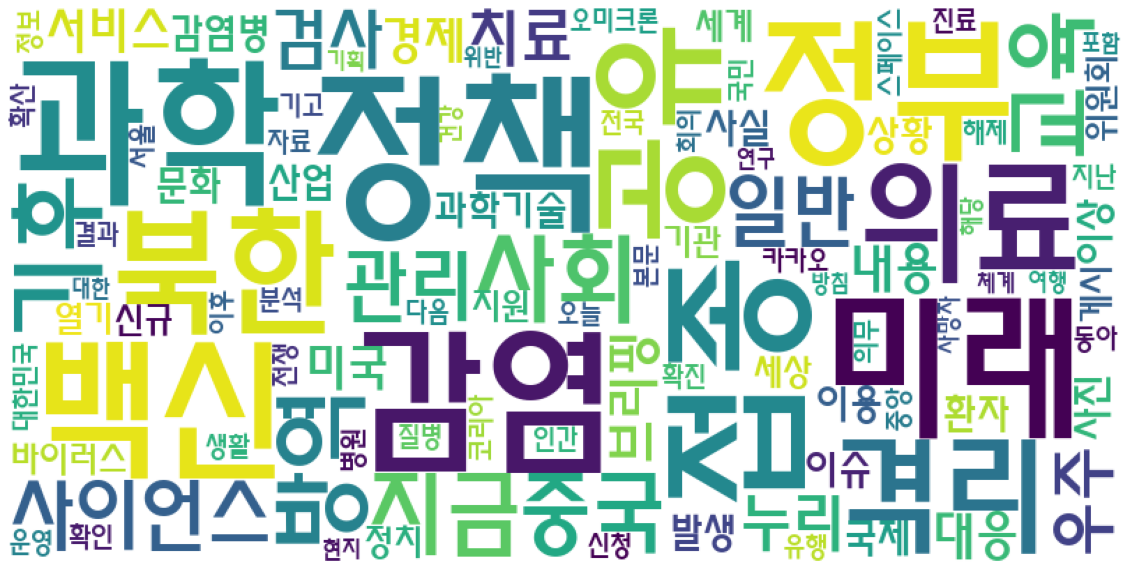

In [18]:
params = {
    "width"            : 800,
    "height"           : 400,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
#     "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(dict_data) 

save_img = 'wordcloud/covid_2022_300.png'

plt.figure(figsize=(20,12))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)

In [22]:
# 누리 : 코로나 예방접종 사전예약시스템

In [ ]:
from pandas import Series, DataFrame

In [67]:
# 단어별 건수 확인

VC_words = list()
VC_cnt = list()

for i in range(len(data)):
    vc_words = data[i][0]
    vc_cnt = data[i][1]
  
    VC_words.append(vc_words)
    VC_cnt.append(vc_cnt)

In [70]:
data = {'words': VC_words,
        'cnt' : VC_cnt,}
frame = DataFrame(data)
frame

,words,cnt
0,정책,850
1,과학,518
2,감염,425
3,미래,422
4,접종,387
...,...,...
495,투고,42
496,기철,42
497,년월,42
498,달력,42
